## Week 08 Lab

### Modeling exponential growth of US population

The goal of this exerice is to find the parameters of an exponential fit of US population growth with time

$$ y = a_1 \exp(a_2t) $$

where $y$ is population and $t$ is time in years.

Data for this exercise is located in a text file in the [uspopulation](uspopulation) directory.

This exercise is based on Chapter 38 of Shapiro, B. E. (2016) Scientific Computation: Python Hacking for Math Junkies, Sherwood Forest Publishing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

First, read in the data and put into variables that are easy to remember and type.

In [2]:
df = pd.read_csv('uspopulation/us-population.txt',header=2)
yr = df['YR']
pop = df['USPOP']

Since this example is focused on the US, create a new variable where the year is referenced to the founding of the US.

#### Plotting the data

##### Exercises:

* Estimate the parameters $a_1$ and $a_2$ is to performing a linear least-squares fit to the log-transformed data shown above. Note that log-transforming both sides of the first equation gives $\ln(y) = \ln(a_1) + a_2 t$

* Plot the original data (not transformed) and the exponential fit using these parameters.

### Visualizing the cost function

An extremely inefficient way of optimizing the parameters would be to try every possible combination of parameters within some range. This is called the "brute force" method because it relies on computer power rather than intelligence.

Even though it is inefficient, it is a good way to visualize the cost function in two dimensions.

In [ ]:
# plot the (square root of) the cost function 
# as a function of fit paramters
alla1 = np.linspace(0,3e4,200) 
alla2 = np.linspace(0,0.025,200)

# pre-allocate error matrix
rms = np.nan*np.ones([len(alla1),len(alla2)])

# nested for loop
# go through each combination of parameter pairs in that range
# 200 x 200 = 40000 values
for ii,a1 in enumerate(alla1):
    for jj,a2 in enumerate(alla2):
        popfit = a1*np.exp(a2*t)
        rms[ii,jj] = np.sqrt(np.mean((popfit-pop)**2))

plt.figure()
plt.pcolor(alla2,alla1,np.log(rms),cmap='viridis')
#plt.plot(slope,np.exp(intercept),'ro')
plt.colorbar()
plt.title('log(RMS error): $a_1\exp(a_2*t)$')
plt.xlabel('$a_2$')
plt.ylabel('$a_1$')

### Non-linear optimization

The first step in this process is to define the function that you want to fit to data.

##### Exercise: insert code for the function below

In [10]:
def exponential_growth(t,a1,a2):
    '''inputs:
    t - vector of times
    a1 - initial population at time 0
    a2 - specific growth rate
    
    returns: modeled population based on exponential growth equation
    '''
    # insert code here
    

The `scipy.optimize` library can be used to find the unknown coefficients. The `curve_fit` function is especially good at find the minima of cost functions. It needs to have 1) the function being fit (`exponential_growth1`) and 2) the data values (`t`,`pop`). It also really helps to have a good initial guess for the parameter values (`p0`).

The first variable in the output (`popt`) is the two coefficients that give the optimal fit to the data.

### Estimating error of coefficients

The second variable in the output (`pcov`) is the error covariance matrix.

The diagonal elements of the covariance matrix can be thought of as the variance that there would be in the coefficient if you resampled many times and repeated the fit procedure. This could be estimated from the data using subsets of the data.

The square root of the diagonals are called the _standard errors_ of the parameter estimates (e.g. $\sigma_a$ for parameter estimate $\hat{a}$). If you resampled many times, and the errors are normally distributed, then about 68% of the parameter estimates would fall in the interval $\hat{a}-\sigma_a < a < \hat{a}+\sigma_a$. Confidence intervals can be computed using the standard error and the t-statistic.

The diagonals of the error covariance matrix decribe correlations that occur in estimates of the different parameters. For example, if you resample many times, does parameter $a$ usually increase when parameter $b$ increases? If so, this means that the parameters covary when resampling, and this would result in a positive error covariance term.

<ipython-input-25-34753d424436>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(alla2,alla1,np.log(rms),cmap='viridis')


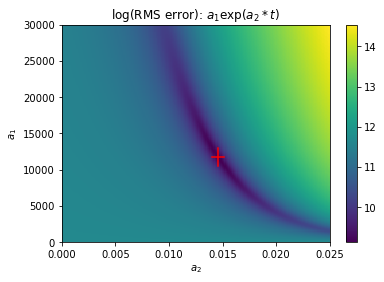

In [25]:
plt.figure()
plt.pcolor(alla2,alla1,np.log(rms),cmap='viridis')
plt.colorbar()
#plt.plot(slope,np.exp(intercept),'ro')
#plt.plot(popt[1],popt[0],'rs')
plt.title('log(RMS error): $a_1\exp(a_2*t)$')
plt.xlabel('$a_2$')
plt.ylabel('$a_1$')

plt.plot([popt[1]-err[1],popt[1]+err[1]],
         [popt[0],popt[0]],'r-')
plt.plot([popt[1],popt[1]],
         [popt[0]-err[0],popt[0]+err[0]],'r-')

Plotting the parameter estimate on the map of the cost function shows that the nonlinear optimization procedure (square) succeeds in finding the minimum of the cost function, thus minimizing the sum of squared differences between the data values and corresponding model values.

The standard errors can be visualized in this map of the cost function. The height and width of the red error bars are determined by the standard errors of the coefficients. 

### Excercises

* Plot the parameters obtained from the linear regression of the log-transformed data on the cost function map.
* Use the optimization techniques described above to fit an exponential curve to the data from a sediment transport study or phytoplankton growth experiments (see other notebooks).